# SAM

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

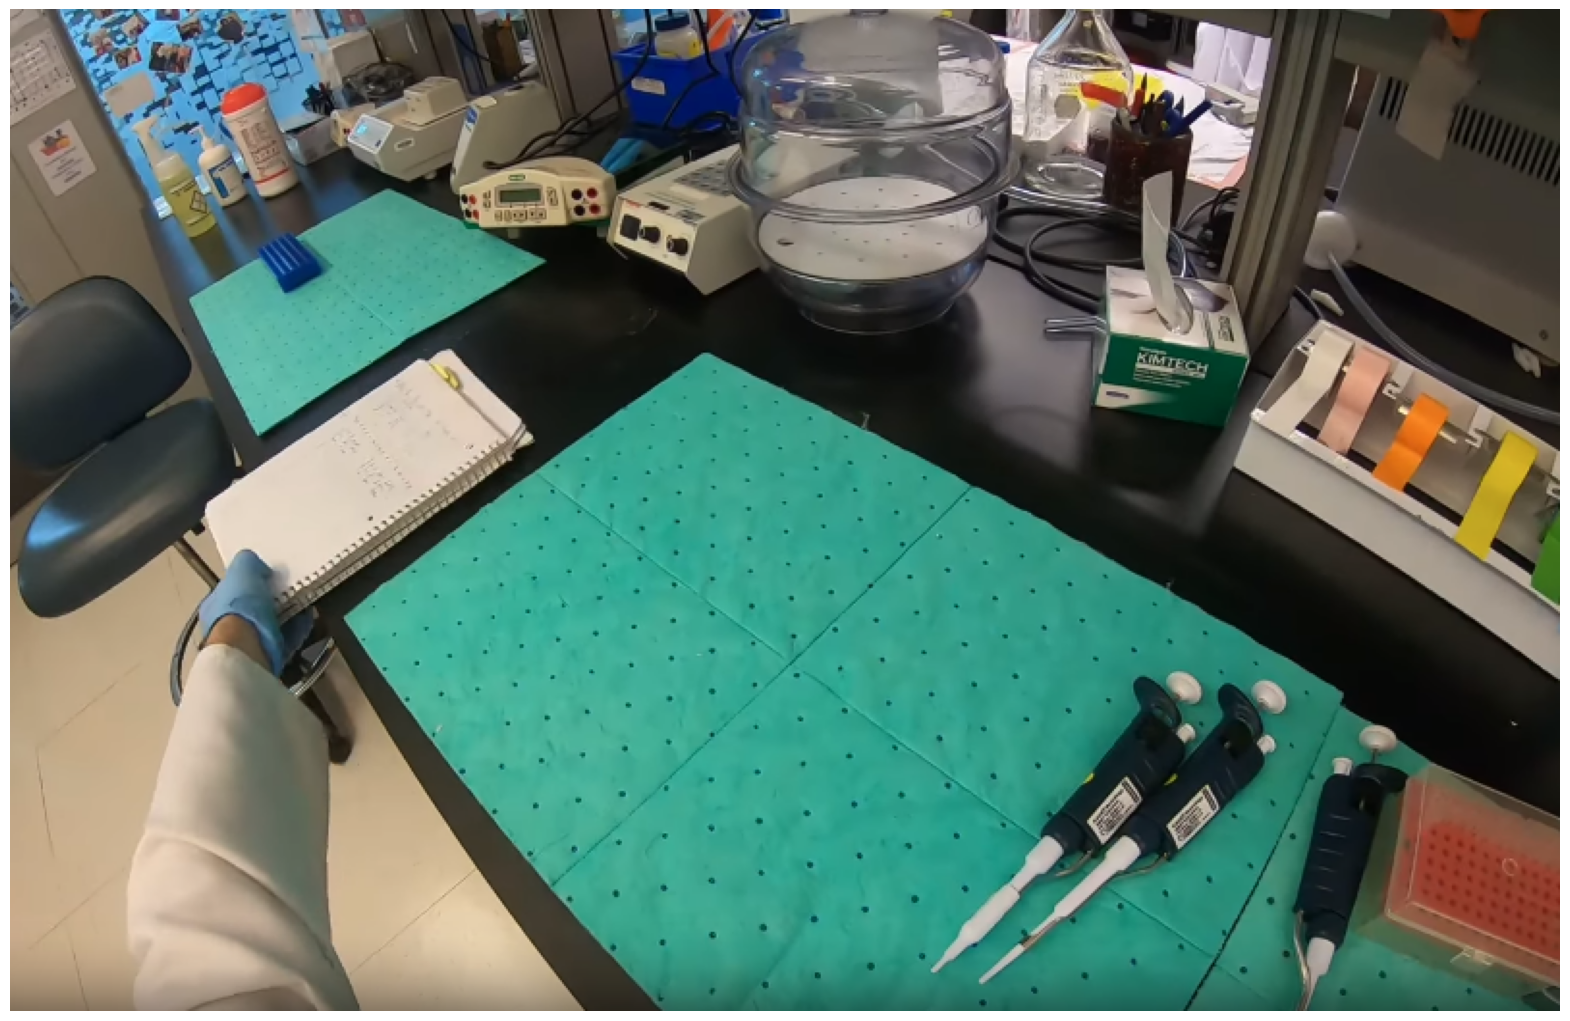

In [7]:
image = cv2.imread('data/test.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [9]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

In [12]:
len(masks)

76

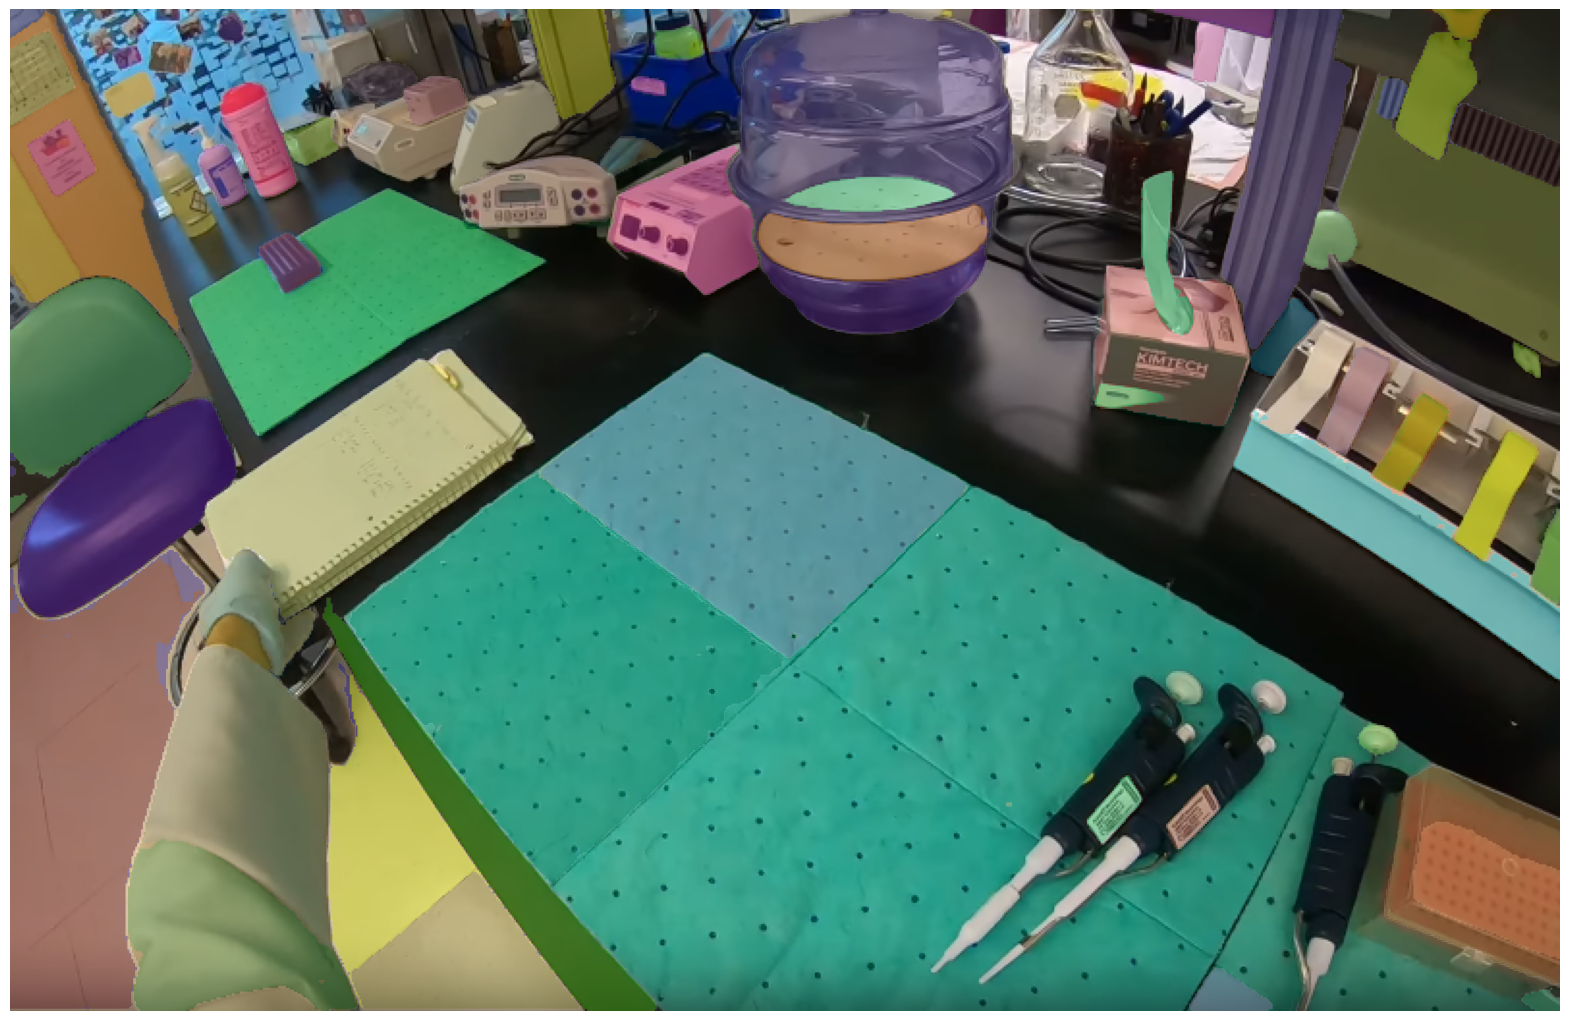

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

# Fast SAM


In [13]:
from ultralytics import FastSAM
from ultralytics.models.fastsam import FastSAMPrompt

In [14]:
# Define an inference source
source = 'data/test.png'

# Create a FastSAM model
model = FastSAM('FastSAM-s.pt')  # or FastSAM-x.pt

100%|██████████| 22.7M/22.7M [00:02<00:00, 10.9MB/s]


In [19]:
# Run inference on an image
everything_results = model(source, device='cpu', retina_masks=True, conf=0.7, iou=0.9, save=True)


image 1/1 /home/nyian/thesis/object_affordance/data/test.png: 416x640 21 objects, 150.3ms
Speed: 4.7ms preprocess, 150.3ms inference, 26.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/segment/predict2
